# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [3]:
import pandas as pd

In [4]:
movies_df = pd.read_csv('./data/movies.csv')

In [5]:
movies_df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [6]:
movies_df.isnull()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
9994,False,False,False,True,False,False,True,True,True
9995,False,False,False,True,False,False,True,True,True
9996,False,False,False,True,False,False,True,True,True
9997,False,False,False,True,False,False,True,True,True


In [7]:
movies_df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [8]:
movies_df.fillna({'YEAR': 'Unknown'}, inplace=True)

In [9]:
movies_df.fillna({'GENRE':'Unknown'}, inplace=True)

In [10]:
median = movies_df.RATING.median()
movies_df.fillna({'RATING': median}, inplace=True)

In [11]:
movies_df.fillna({'VOTES': 0}, inplace=True)

**1.4 Drop the duplicated rows**

In [12]:
movies_df.drop_duplicates(inplace=True)

**1.5 Replace the columns names to make them all lowercase**

In [13]:
movies_df.rename(columns=str.lower, inplace=True)


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [14]:
movies_df.votes = movies_df.votes.str.replace(",","" )
movies_df.votes = movies_df.votes.str.replace(' ', '')


In [15]:
movies_df.votes.astype(float)

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9993         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: votes, Length: 9568, dtype: float64

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [16]:
movies_df["rating"].mean()

np.float64(6.94608068561873)

**2.2 What is the maximum runtime?**

In [17]:
movies_df["rating"].min()

np.float64(1.1)

**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [18]:
movies_df.head(5)

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",7.1,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [19]:
movies_df['runtime'] = pd.to_numeric(movies_df['runtime'], errors='coerce')
max_runtime=movies_df['runtime'].max() 
longest_runtime_movie = movies_df[movies_df['runtime'] == max_runtime]
movie_name = longest_runtime_movie['movies'].values[0]
movie_name

'El tiempo entre costuras'

**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

In [20]:
import matplotlib.pyplot as plt

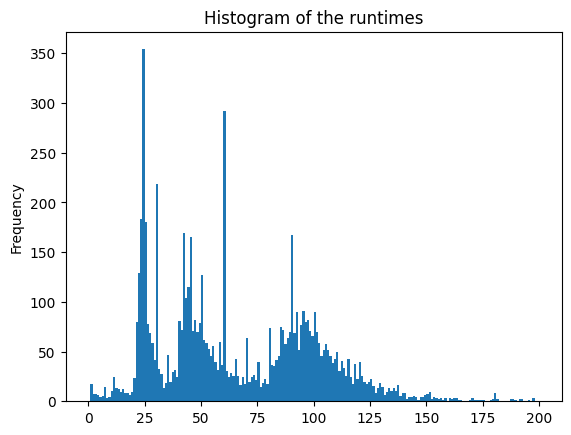

In [21]:
movies_df.runtime.plot(kind='hist', title="Histogram of the runtimes", range=(0,200), bins=200 );

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [27]:
movies_df['votes'] = pd.to_numeric(movies_df['votes'], errors='coerce')
top_10_percent_votes = movies_df['votes'].quantile(0.90)
print(top_10_percent_votes)

22193.100000000035


C:\Users\varoz\AppData\Local\Temp\ipykernel_14012\911981821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['votes'] = pd.to_numeric(movies_df['votes'], errors='coerce')


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [45]:
df_meta = pd.read_csv('./data/movies_metadata.csv')

C:\Users\varoz\AppData\Local\Temp\ipykernel_14012\3142478039.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('./data/movies_metadata.csv')


In [49]:
df_meta.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [47]:
merge_df = movies_df.merge(df_meta, how="inner", left_on= "votes", right_on="vote_count")

In [48]:
merge_df.head(10)

,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,...,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,Feels Like Ishq,(2021– ),"\nComedy, Drama, Romance",6.6,\nShort films follow young adults as they navi...,"\n \n Stars:\nJojo Singh, \nMihi...",848,32.0,NaN,False,...,1999-03-05,75902208.0,97.0,"[{'iso_639_1': 'vi', 'name': 'Tiếng Việt'}, {'...",Released,"In the game of seduction, There is only one ru...",Cruel Intentions,False,6.6,848.0
1,Feels Like Ishq,(2021– ),"\nComedy, Drama, Romance",6.6,\nShort films follow young adults as they navi...,"\n \n Stars:\nJojo Singh, \nMihi...",848,32.0,NaN,False,...,1999-01-22,30471.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Thy Kingdom Come. Thy Will Be Done.,The Boondock Saints,False,7.2,848.0
2,Feels Like Ishq,(2021– ),"\nComedy, Drama, Romance",6.6,\nShort films follow young adults as they navi...,"\n \n Stars:\nJojo Singh, \nMihi...",848,32.0,NaN,False,...,2008-10-23,113857533.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You Won't Believe How It Ends,Saw V,False,6.0,848.0
3,Feels Like Ishq,(2021– ),"\nComedy, Drama, Romance",6.6,\nShort films follow young adults as they navi...,"\n \n Stars:\nJojo Singh, \nMihi...",848,32.0,NaN,False,...,2011-07-27,60965854.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Revenge is beautiful.,Colombiana,False,6.5,848.0
4,Feels Like Ishq,(2021– ),"\nComedy, Drama, Romance",6.6,\nShort films follow young adults as they navi...,"\n \n Stars:\nJojo Singh, \nMihi...",848,32.0,NaN,False,...,2012-08-24,31083599.0,91.0,"[{'iso_639_1': 'zh', 'name': '普通话'}, {'iso_639...",Released,Ride Like Hell,Premium Rush,False,6.2,848.0
5,Bartkowiak,(2021),"\nAction, Crime, Sport",5.0,"\nAfter his brother dies in a car crash, a dis...",\n Director:\nDaniel Markowicz\n| \n Sta...,398,91.0,NaN,False,...,2009-07-31,61458982.0,146.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"George Simmons was prepared to die, but then a...",Funny People,False,5.6,398.0
6,Bartkowiak,(2021),"\nAction, Crime, Sport",5.0,"\nAfter his brother dies in a car crash, a dis...",\n Director:\nDaniel Markowicz\n| \n Sta...,398,91.0,NaN,False,...,2009-08-26,0.0,155.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Escaping the prison of life.,A Prophet,False,7.5,398.0
7,Bartkowiak,(2021),"\nAction, Crime, Sport",5.0,"\nAfter his brother dies in a car crash, a dis...",\n Director:\nDaniel Markowicz\n| \n Sta...,398,91.0,NaN,False,...,2014-05-21,1338365.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Eventually stars burn out,Maps to the Stars,False,5.8,398.0
8,Hostage House,(2021),\nThriller,3.7,\nWhen an ambitious realtor and her daughter a...,\n Director:\nDavid Benullo\n| \n Stars:...,315,85.0,NaN,False,...,1999-10-15,0.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Straight Story,False,7.7,315.0
9,Hostage House,(2021),\nThriller,3.7,\nWhen an ambitious realtor and her daughter a...,\n Director:\nDavid Benullo\n| \n Stars:...,315,85.0,NaN,False,...,2009-09-30,0.0,91.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Little Nicholas,False,5.9,315.0
